In [1]:
# importing libraries

In [2]:
import cv2
import pandas as pd
import numpy as np

In [3]:
# # Percentage of orange color

import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

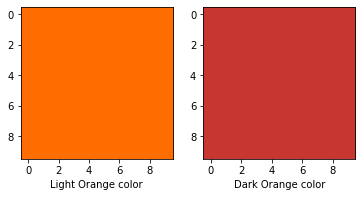

In [4]:
#defining the range of orange color
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.xlabel('Light Orange color')
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.xlabel('Dark Orange color')
plt.show()

In [5]:
def orange_color_percertage(img,box,show_image=0):
    height, width, _ = img.shape
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in box:
        if i<0:
            box[box.index(i)]=0 
    x, y, w, h = box
    if x>width:
        box[0]=width 
    if w>width:
        box[0]=width
    if y>height:
        box[0]=height
    if h>height:
        box[0]=height
    image=img[y:y+h, x:x+w] 
    #img must be in BGR form
    grid_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask= cv2.inRange(grid_HSV, light_orange, dark_orange)
    res = cv2.bitwise_and(image, image, mask=mask)
    if show_image==1:
        #print("Orange Part of Image")
        plt.figure(figsize=(20,8))
        plt.imshow(res)
    return (mask>0).mean()

In [6]:
#model and weight initialization
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

In [7]:
img=cv2.imread('orange.jpg')#image path

In [8]:
# detecting oranges (classid=55)
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)
classIds, confs, bbox = net.detect(img,confThreshold=0.5)
for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
    if classId==55:
        img=cv2.rectangle(img,box,color=(0,255,0),thickness=2)
        img=cv2.putText(img,"ORANGE",(box[0],box[1]-5),
                        cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
        img=cv2.putText(img,'% color '+str(round(orange_color_percertage(img,box),2)),(box[0],box[1]+25),
                        cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
            

In [9]:
#Press ESC to exit
while True:
    cv2.imshow('my',img)
    #cv2.imwrite('orange with color%.png',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [10]:
# detecting oranges from live videos

In [16]:
cap = cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)
cap.set(10,70)
while True:
    success,img = cap.read()
    classIds, confs, bbox = net.detect(img,confThreshold=0.5)
    if len(classIds) != 0:
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            if classId==55:
                cv2.rectangle(img,box,color=(0,255,0),thickness=2)
                cv2.putText(img,'person',(box[0]+10,box[1]+30),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
                cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
                img=cv2.putText(img,'% color '+str(round(orange_color_percertage(img,box),2)),(box[0],box[1]+25),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)

    cv2.imshow("Output",img)
    if cv2.waitKey(25) & 0xff == 27:
        break
cap.release()
cv2.destroyAllWindows()